<a href="https://colab.research.google.com/github/SuloveBhattarai/recurrentnet1/blob/main/RecurrentNeuralNet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y= [], []
total_size= 250
time_steps= 25
sin_wave= np.sin(np.arange(total_size))
for step in range(sin_wave.shape[0]- time_steps):
  X.append(sin_wave[step: step+ time_steps])
  y.append(sin_wave[step+ time_steps])

Text(0.5, 1.0, 'Sine wave')

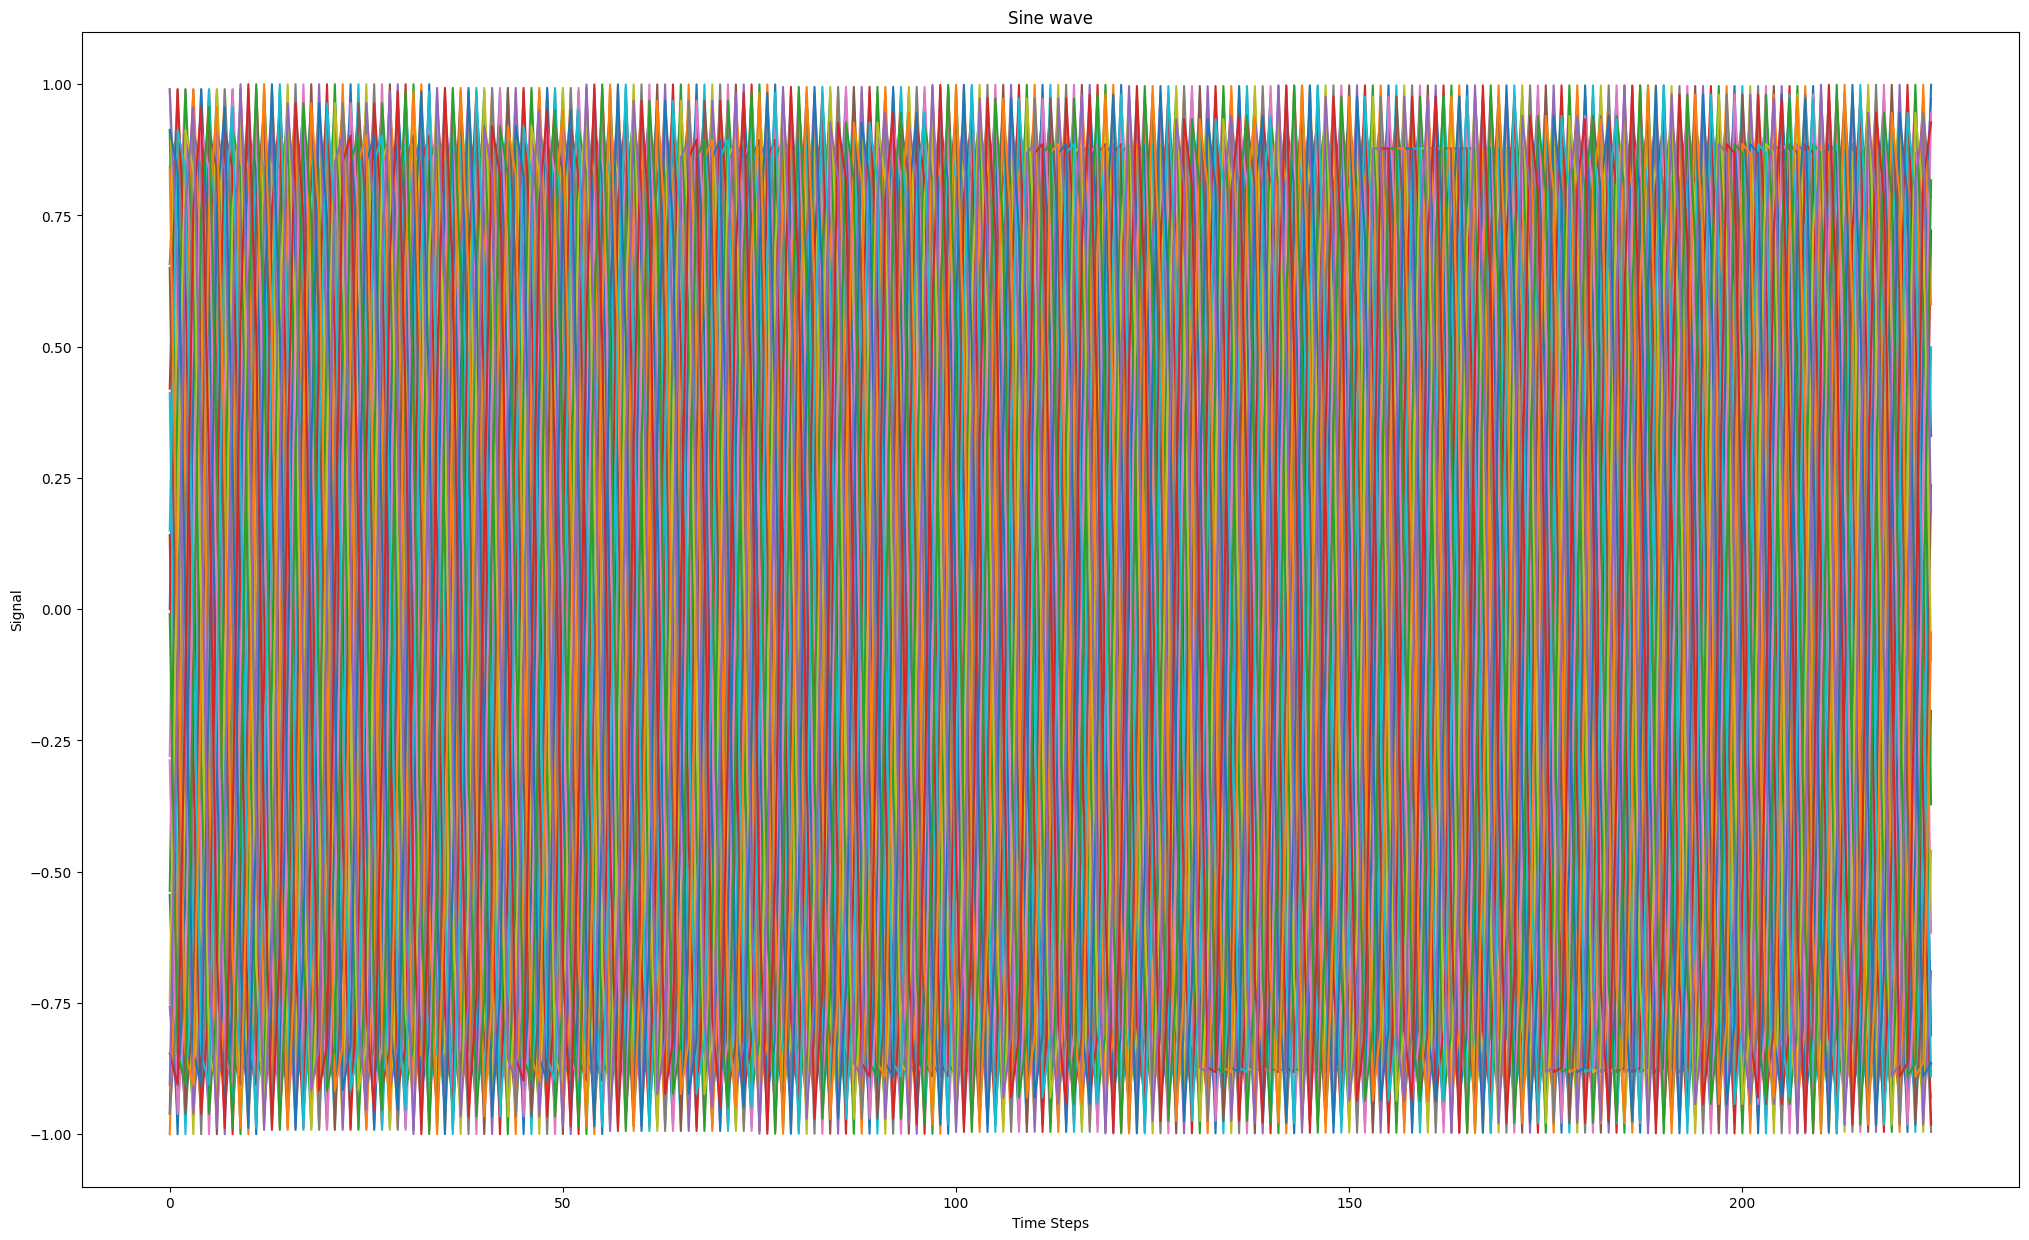

In [5]:
plt.figure(figsize= (25,15))
plt.plot(X)
plt.xlabel("Time Steps")
plt.ylabel("Signal")
plt.title("Sine wave")

Text(0.5, 1.0, 'Sine wave')

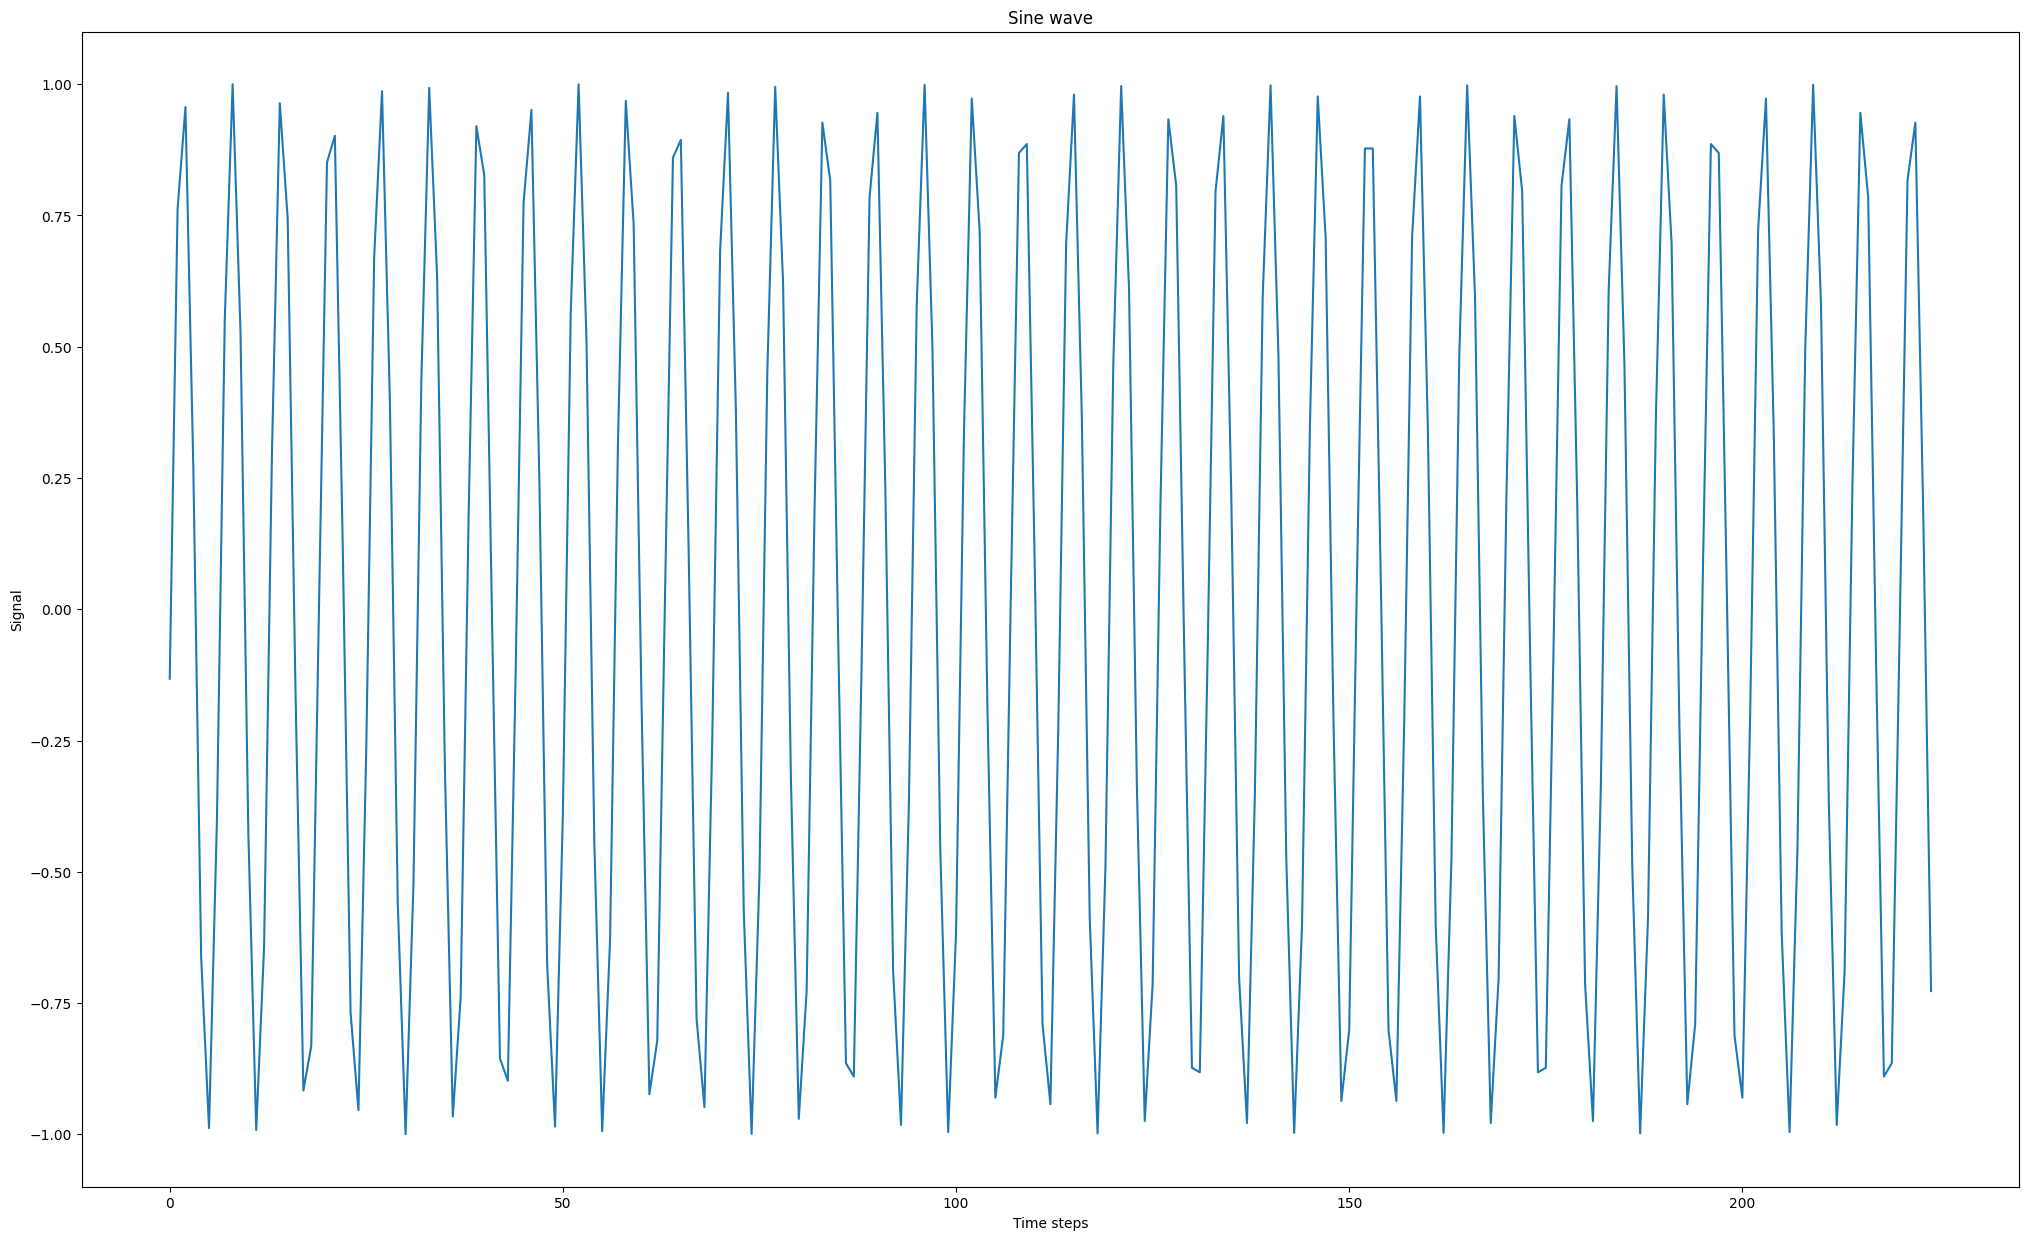

In [6]:
plt.figure(figsize= (25, 15))
plt.plot(y)
plt.xlabel("Time steps")
plt.ylabel("Signal")
plt.title("Sine wave")

In [7]:
X= np.array(X).reshape(len(y), time_steps, 1)
X.shape

(225, 25, 1)

In [8]:
y= np.array(y).reshape(len(y),1)
y.shape

(225, 1)

In [19]:
class VanillaRNN:
    def __init__(self, input_size,hidden_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.Wx = np.random.randn(self.hidden_size, self.input_size.shape[2])
        self.Wh = np.random.randn(self.hidden_size, self.hidden_size)
        self.Wy = np.random.randn(self.output_size.shape[1],self.hidden_size)

    def activation(self, xt, ht_1):
        ht = np.tanh(np.dot(self.Wx,xt.reshape(1,1)) + np.dot(self.Wh,ht_1))
        yt = np.dot(self.Wy,ht)
        return ht, yt

    def forward(self, sample):
        sample_input, sample_output = self.input_size[sample], self.output_size[sample]
        #initial hidden state at h(0)
        ht = np.zeros((self.hidden_size,1)) # since h1 is the initial state make it zero
        self.hidden_states = [ht]
        self.inputs = []
        for step in range(len(sample_input)):
            ht, yt = self.activation(sample_input[step],ht)
            self.inputs.append(sample_input[step].reshape(1,1))
            self.hidden_states.append(ht)

        self.error = yt - sample_output
        self.loss = 0.5*self.error**2
        self.yt = yt

    def backward(self):
        n = len(self.inputs)
        dyt = self.error
        dWy = np.dot(dyt,self.hidden_states[-1].T)
        dht = np.dot(dyt, self.Wy).T
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)

        for step in reversed(range(n)):
            temp = (1-self.hidden_states[step+1]**2) * dht
            dWx += np.dot(temp, self.inputs[step].T)
            dWh += np.dot(temp, self.hidden_states[step].T)
            dht = np.dot(self.Wh, temp)

        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh

    def training(self, epochs=10, learning_rate=1e-4):
        self.update = []
        self.lr = learning_rate
        for epoch in range(epochs):
            for sample in range(self.input_size.shape[0]):
                self.forward(sample)
                self.backward()
            self.update.append(np.squeeze(self.loss / self.input_size.shape[0]))
            self.loss = 0

    def testing(self,x,y):
        self.x = x
        self.y = y
        self.outputs = []
        for sample in range(len(x)):
            self.forward(sample)
            self.outputs.append(self.yt)

In [20]:
hidden_size= 128
RNN= VanillaRNN(X, hidden_size, y)


In [21]:
RNN.training(15, 1e-2)


In [22]:
X_test, y_test= [], []
total_size= 400
time_steps= 25
sin_wave= np.sin(np.arange(total_size))
for step in range(sin_wave.shape[0]- time_steps):
  X_test.append(sin_wave[step:step+ time_steps])
  y_test.append(sin_wave[step+time_steps])


In [23]:
X_sample, y_sample= X_test[300:], y_test[300:]


In [24]:
X_sample= np.array(X_sample).reshape(len(y_sample),time_steps, 1)
y_sample= np.array(y_sample).reshape(len(y_sample),1)

In [25]:
RNN.testing(X_sample, y_sample)



In [26]:
pred= np.array(RNN.outputs).reshape(y_sample.shape)


In [27]:
len(pred), len(X_sample)

(75, 75)

In [28]:
len(RNN.update)

15

Text(0, 0.5, 'Loss')

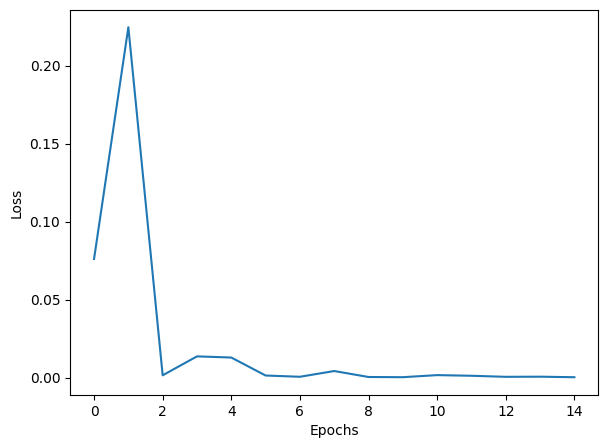

In [30]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(RNN.update)
plt.xlabel("Epochs")
plt.ylabel("Loss")

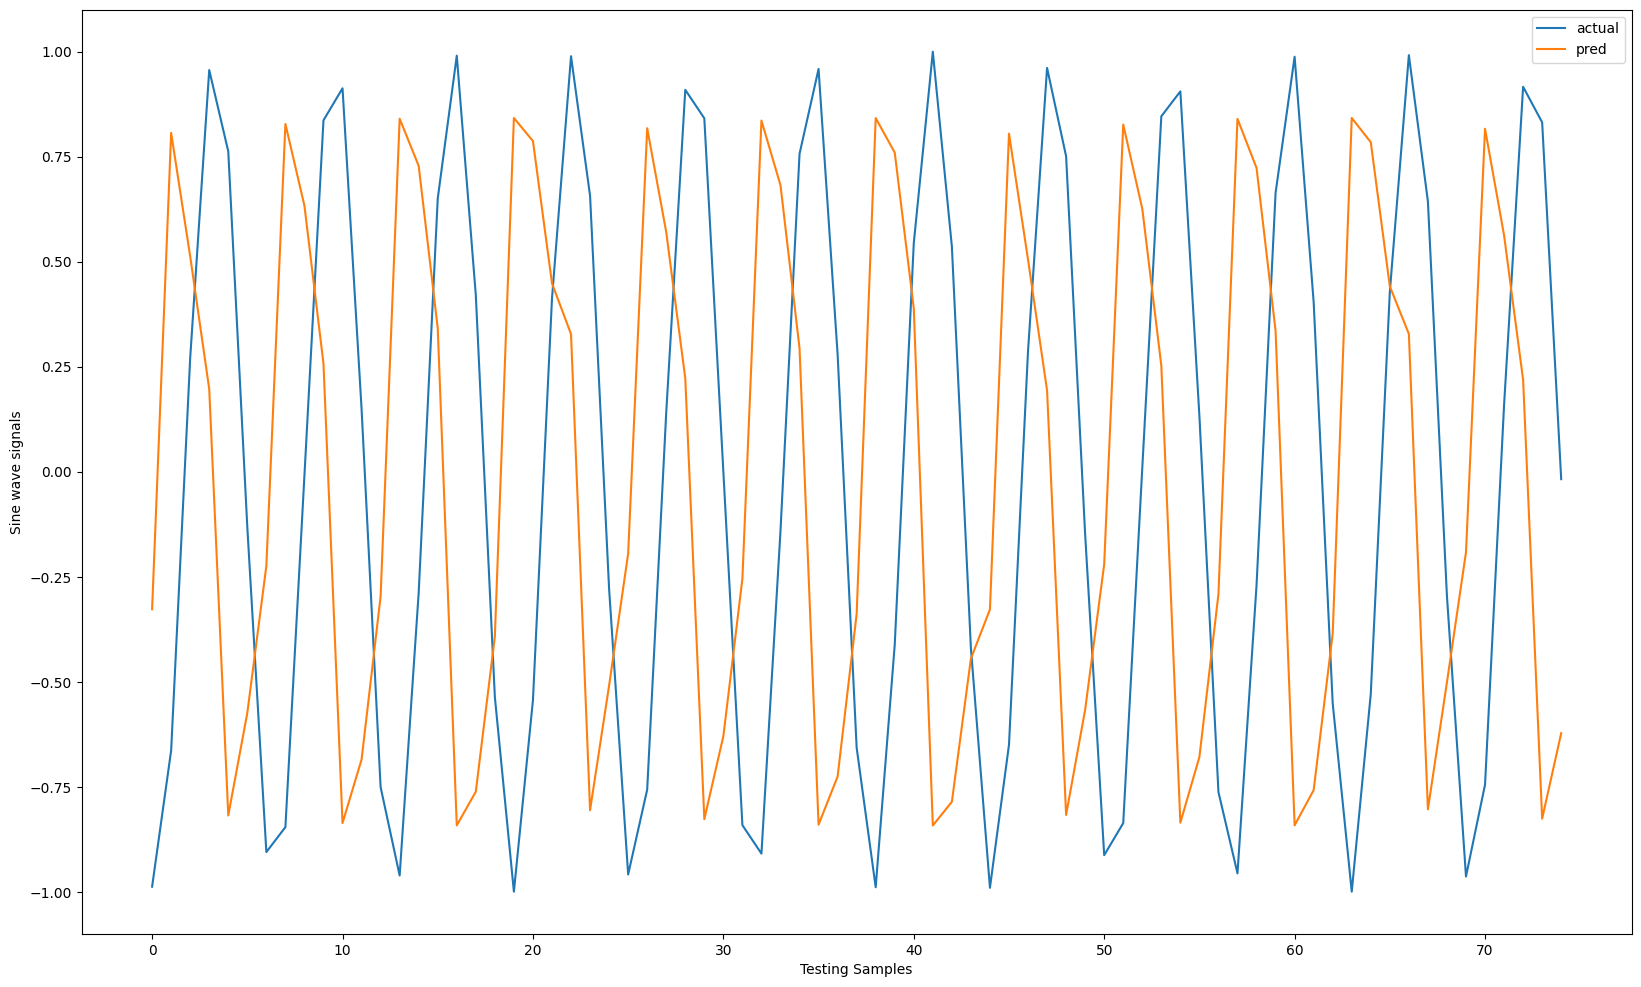

In [31]:
plt.figure(figsize=(20,12))
plt.plot(range(len(X_sample)),y_sample,label="actual")
plt.plot(range(len(X_sample)),pred,label="pred")
plt.xlabel("Testing Samples")
plt.ylabel("Sine wave signals")
plt.legend()